# Housing Notebook <br> ~Ram Adesara

---

### This notebook will examine housing in Pittsburgh, specifically, the percentage of occupied units, the median home value, and the established average years of residence. These factors, out of all the factors in the dataset, were the top three ones, according to a survey we conducted on Google Forms.

## The Dataset

The pandas, numpy, geopandas, matplot and the housing CSV file are imported. The CSV is saved to the variable "data" as a pandas dataframe.

In [62]:
import pandas as pd
import numpy as np
import geopandas as geo
%matplotlib inline
import matplotlib.pyplot as plt
data = pd.read_csv("housing.csv", 
                                       index_col="Neighborhood")
data.head(10)

# % Occupied Units
# Median Home Value
# Est. Avg. Years of Residence

,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),Est. Avg. Yrs. of Residence (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,3,933,675,"1,052",51.5%,48.5%,535,10.1%,89.9%,0,...,1.3%,"$86,500","$109,535","$136,300",24.4%,NaN,0,0,0,0.0%
Allegheny West,3,462,390,355,74.9%,25.1%,203,18.2%,81.8%,15,...,57.4%,"$159,700","$202,228","$123,600",-38.9%,"$309,940",7,0,1,0.3%
Allentown,6,"2,500","1,505","1,291",80.0%,20.0%,953,59.2%,40.8%,5,...,62.9%,"$34,300","$43,434","$42,200",-2.8%,"$8,500",70,27,11,0.9%
Arlington,7,"1,869",880,886,86.6%,13.4%,754,65.4%,34.6%,11,...,72.3%,"$38,800","$49,132","$44,200",-10.0%,"$15,397",34,12,13,1.5%
Arlington Heights,7,244,557,148,91.2%,8.8%,139,18.7%,81.3%,2,...,9.2%,"$45,000","$56,984","$64,400",13.0%,NaN,0,0,0,0.0%
Banksville,5,"4,144","2,203","2,118",95.4%,4.6%,"2,093",49.9%,50.1%,5,...,4.6%,"$87,200","$110,421","$110,900",0.4%,"$101,431",40,7,5,0.2%
Bedford Dwellings,15,"1,202","1,049",746,87.3%,12.7%,695,7.6%,92.4%,2,...,38.6%,"$17,200","$21,780","$81,100",272.4%,$200,1,0,1,0.1%
Beechview,5,"7,974","4,048","3,939",89.3%,10.7%,"3,518",58.7%,41.3%,6,...,42.7%,"$56,150","$71,103","$72,400",1.8%,"$36,068",128,64,40,1.0%
Beltzhoover,6,"1,925","1,298","1,085",73.5%,26.5%,849,73.5%,26.5%,17,...,67.4%,"$34,000","$43,054","$36,000",-16.4%,"$2,744",39,12,11,1.0%


This is a preview of our housing dataset. It consists of many different columns which provide information about housing in Pittsburgh.

## Percentage Occupied Units Analysis

There are a few things required to be done before the analysis of the first column, percentage of occupied units, can be analyzed. Firstly, the percentage symbol of each cell from this column is stripped away using rstrip() and the data is converted from a string to a float. This column is now numerical.

Next, a new dataframe called "units" is created which consists of two columns: the names of the Pittsburgh neighborhoods and the numerical values of the percentage of occupied units.

The mean is calculated, converted to a float, and saved to the variable, "mean".

A new dataframe is created, called, "units_df", which is simply a replica of the data from units. Next, a new, blank column is created in units_df, called, "Falls Above Avg Percentage Occupied Units?".

Now, each cell is compared to the mean. If the data is above the mean, it gets assigned "Yes" in the "Falls Above Avg Percentage Occupied Units?" column. Otherwise, if the data is below the mean, it gets assigned "No" in this column.

Another new, blank column is now created in units_df. It is called, "Occupied Units Points", which will store the score (aka points) that each cell has. This score is calculated in the code that follows. Basically, all the cells which had "No" in the "Falls Above Avg Percentage Occupied Units?" column were assigned a score of 0. All the cells which had "Yes" were first sorted in descending order, and then they were counted. There were 52 cells assigned "Yes". The weight for Percentage Occupied Units was roughly 3.68. So each cell was assigned a score by multiplying its position with 3.68. For example, Chateau did best for percentage occupied units, so its score was 52 * 3.68 = 191.3.

Lastly, the values of percentage occupied units are sorted in descending order in units_df and the first 10 elements of the dataframe are printed.

In [55]:
# % Occupied Units

count = 0
for x in data["% Occupied Units (2010)"]:
     x = str(x).rstrip('%')
     data.iloc[count, 4] = float(x)
     count+=1

units = data.sort_values(by=['% Occupied Units (2010)'], ascending = False).iloc[0:, 4:5]
    
mean = float(units.mean())
units_df = pd.DataFrame(units)

units_df["Falls Above Avg Percentage Occupied Units?"] = np.nan

c = 0
for x in range(len(units)):
    temp = units.iloc[x,0]
    if temp > mean:
        units_df.iloc[x,1] = "Yes"
        c+=1
    else:
        units_df.iloc[x,1] = "No"

units_df["Occupied Units Points"] = np.nan

for x in range(len(units_df)):
    if(c-x > 0):
        units_df.iloc[x,2] = (c-x)*weights.iloc[len(weights)-1, 4]
    else:
        units_df.iloc[x,2] = 0

units_df = units_df.sort_values(by=["% Occupied Units (2010)"], ascending=False)
units_df.head(8)

,% Occupied Units (2010),Falls Above Avg Percentage Occupied Units?,Occupied Units Points
Neighborhood,,,
Chateau,100,Yes,191.264368
Swisshelm Park,96.3,Yes,187.586207
Ridgemont,95.9,Yes,183.908046
Banksville,95.4,Yes,180.229885
Oakwood,95.4,Yes,176.551724
Regent Square,95.2,Yes,172.873563
Point Breeze,95.1,Yes,169.195402
Glen Hazel,94.8,Yes,165.517241


Here, a map is created using geopandas. The map represents the percentage of occupied units for each neighborhood in Pittsburgh. The map was created by merging the units table we previously created with the shape file of the Pittsburgh map.

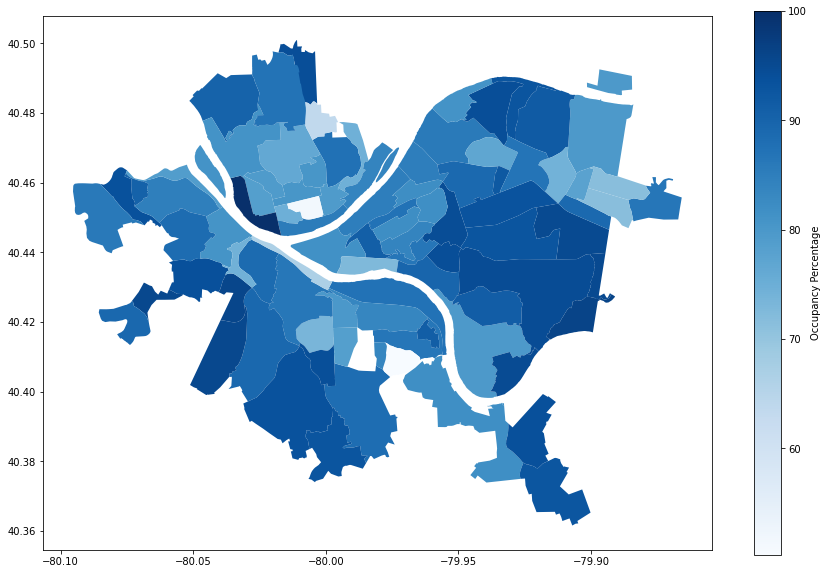

In [30]:
occ_series = units.groupby("Neighborhood").sum()['% Occupied Units (2010)']
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
occ_map = neighborhoods.merge(occ_series, how='left', left_on='hood', right_on='Neighborhood')
occ_map.plot(column='% Occupied Units (2010)',
                  cmap='Blues',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Occupancy Percentage"}
                  )

## Median Home Value Analysis

The same process was repeated for median home value: the values were made numerical by removing the percentage symbol and commas, these values were put into a units table, the mean was calculated, and finally a score was given to the data by multiplying its position by the weight for median home value.

In [63]:
# Median Home Value

count = 0
for x in data["Median Home  Value (2010)"]:
    x = str(x).replace('$','')
    x = str(x).replace(',','')
    data.iloc[count, 20] = float(x)
    count+=1
    
mhv_units = data.sort_values(by=["Median Home  Value (2010)"], ascending=False).iloc[0:, 20:21]

mhv_mean = float(mhv_units.mean())

mhv_df = pd.DataFrame(mhv_units)
mhv_df["Below Mean?"] = np.nan

c = 0
for x in range(len(mhv_units)):
    mhv_temp = mhv_units.iloc[x,0]
    if mhv_temp < mhv_mean:
        mhv_df.iloc[x,1] = "Yes"
        c+=1
    else:
        mhv_df.iloc[x,1] = "No"
mhv_df = mhv_df.sort_values(by=["Median Home  Value (2010)"], ascending=True)

mhv_df["Median Home  Value Points"] = np.nan

for x in range(len(mhv_df)):
    if(c-x > 0):
        mhv_df.iloc[x,2] = (c-x)*weights.iloc[len(weights)-1, 3]
    else:
        mhv_df.iloc[x,2] = 0
mhv_df.head(10)

,Median Home Value (2010),Below Mean?,Median Home Value Points
Neighborhood,,,
Bluff,21200,Yes,247.183908
West End,29800,Yes,242.689655
Homewood West,34500,Yes,238.195402
Larimer,34850,Yes,233.701149
Homewood North,35450,Yes,229.206897
Beltzhoover,36000,Yes,224.712644
Knoxville,39900,Yes,220.218391
East Hills,40700,Yes,215.724138
St. Clair,41100,Yes,211.229885


The map was created for median home value using the same process as done for percentage of occupied units.

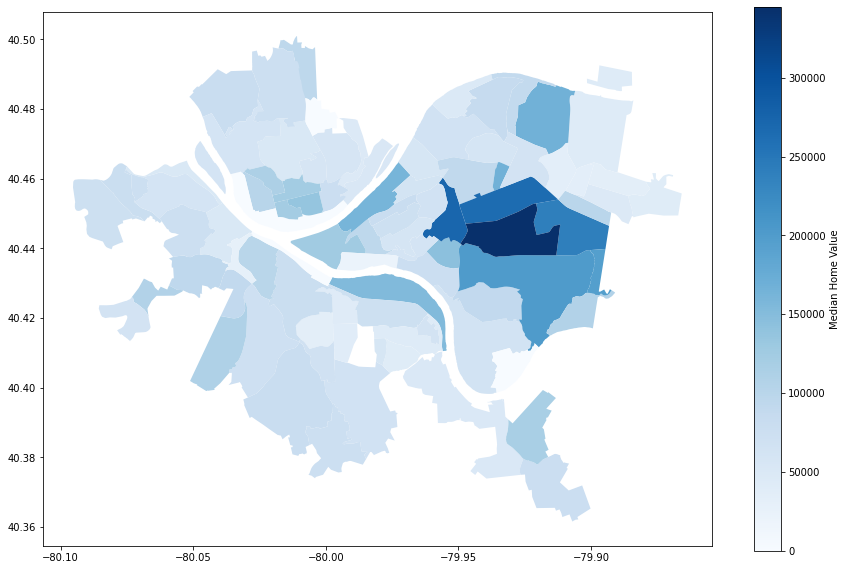

In [32]:
mhv_series = mhv_units.groupby("Neighborhood").sum()['Median Home  Value (2010)']
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
mhv_map = neighborhoods.merge(mhv_series, how='left', left_on='hood', right_on='Neighborhood')
mhv_map.plot(column='Median Home  Value (2010)',
                    cmap='Blues',
                    figsize=(15,10),
                    legend=True,
                    legend_kwds={'label':"Median Home Value"})

## Established Average Years of Residence Analysis

The last metric in housing was established average years of residence, and it was analyzed using the same process as the previous metrics.

In [64]:
# Est. Avg. Years of Residence

count = 0
for x in data["Est. Avg. Yrs. of Residence (2010)"]:
    data.iloc[count, 9] = float(x)
    count+=1
    
yres_units = data.sort_values(by=["Est. Avg. Yrs. of Residence (2010)"], ascending=False).iloc[0:, 9:10]

yres_mean = float(yres_units.mean())

yres_df = pd.DataFrame(yres_units)
yres_df["Above Mean"] = np.nan

c = 0
for x in range(len(yres_df)):
    yres_temp = yres_units.iloc[x,0]
    if yres_temp > yres_mean:
        yres_df.iloc[x,1] = "Yes"
        c+=1
    else:
        yres_df.iloc[x,1] = "No"
        
yres_df["Avg. Yrs. of Residence Points"] = np.nan

for x in range(len(yres_df)):
    if(c-x > 0):
        yres_df.iloc[x,2] = (c-x)*weights.iloc[len(weights)-1, 5]
    else:
        yres_df.iloc[x,2] = 0

yres_df.head(10)

,Est. Avg. Yrs. of Residence (2010),Above Mean,Avg. Yrs. of Residence Points
Neighborhood,,,
Chartiers City,32.0,Yes,126.735632
East Carnegie,30.0,Yes,123.310345
New Homestead,19.0,Yes,119.885057
Beltzhoover,17.0,Yes,116.459770
South Shore,16.0,Yes,113.034483
Overbrook,16.0,Yes,109.609195
Lincoln Place,15.0,Yes,106.183908
Bon Air,15.0,Yes,102.758621
Allegheny West,15.0,Yes,99.333333


This is the map for established average years of residence in Pittsburgh.

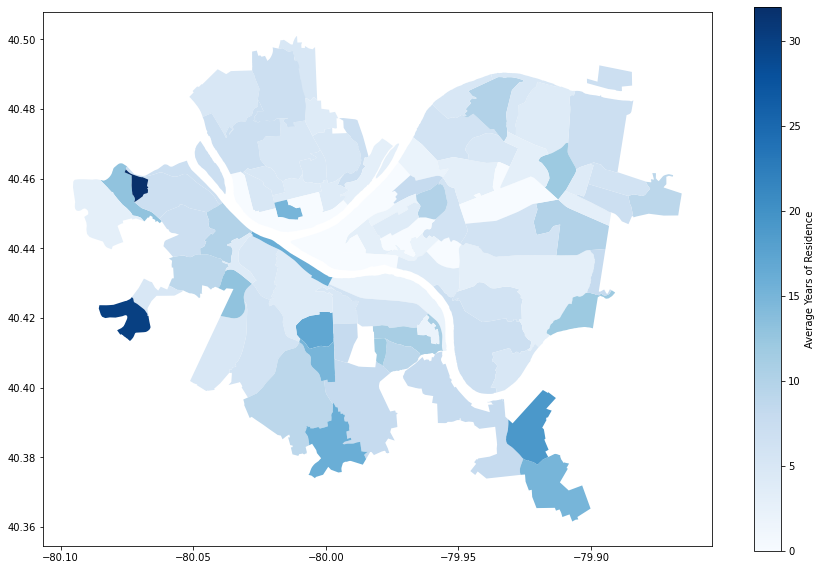

In [65]:
yres_series = yres_units.groupby("Neighborhood").sum()["Est. Avg. Yrs. of Residence (2010)"]
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
yres_map = neighborhoods.merge(yres_series, how='left', left_on='hood', right_on='Neighborhood')
yres_map.plot(column='Est. Avg. Yrs. of Residence (2010)',
             cmap='Blues',
             figsize=(15,10),
             legend=True,
             legend_kwds={'label':"Average Years of Residence"}
             )

Finally, using pd.concat(), the three scores were concatenated together into one dataframe, and a new column called "Housing Final Score" simply adds up the three scores to get the final score for Housing. Here are the winners! The results were sorted by descending order of final score. Beltzhoover, Bon Air, and Larimer got the highest scores for housing!

In [66]:
housing_results = pd.concat([units_df.iloc[0:, 2:3], mhv_df.iloc[0:, 2:3],yres_df.iloc[0:,2:3]], axis=1, join='inner')
housing_results["Housing Final Score"] = np.nan
for x in range(len(housing_results)):
    housing_results.iloc[x,3] = 0
    for y in range(3):
        housing_results.iloc[x,3] += housing_results.iloc[x,y]
housing_results = housing_results.sort_values(by=["Housing Final Score"], ascending = False)
housing_results.head(10)

,Occupied Units Points,Median Home Value Points,Avg. Yrs. of Residence Points,Housing Final Score
Neighborhood,,,,
Beltzhoover,0.000000,224.712644,116.459770,341.172414
Bon Air,143.448276,80.896552,102.758621,327.103448
Larimer,0.000000,233.701149,82.206897,315.908046
Arlington,33.103448,197.747126,78.781609,309.632184
East Carnegie,73.563218,112.356322,123.310345,309.229885
East Hills,29.425287,215.724138,51.379310,296.528736
Overbrook,117.701149,58.425287,109.609195,285.735632
Ridgemont,183.908046,0.000000,95.908046,279.816092
Swisshelm Park,187.586207,0.000000,85.632184,273.218391


## Conclusion

In conclusion, after looking at all the results, Beltzhoover is the best neighborhood for housing! Even though it had a score of 0 for percentage occupied units, it had very high score for years of residence and cost! Our data indicates that Beltzhoover is cheap, and people tend to stay there for a good number of years.

The only issue I have is that when calculating the scores for housing, if the data had a value less than the mean, it was assigned a score of 0. This definitely helps eliminate bad neighborhoods easily, but it affects the calculations a lot since there were quite a lot of "good" neighborhoods with submetrics below the mean. I guess this is an indicator that a lot of neighborhoods of Pittsburgh have outstanding performance in one submetric while having okay perfomance in the others. There are few neighborhoods which had a similar score in all 3 submetrics.

However, I think the method that we followed was good enough to get a rough understanding of which neighborhoods in Pittsburgh are better than others for housing, and using the weights from the survey we conducted definitely helped us improve our findings.